# Crossing moving averages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../data/progress.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [3]:
fast_window = 30
slow_window = 70

df0 = (pd.DataFrame()
            .assign(price=df.close)
            .assign(fast=df.close.ewm(fast_window).mean())
            .assign(slow=df.close.ewm(slow_window).mean()))
df0

,price,fast,slow
time,,,
2021-01-08 19:54:22.456,40095.39,40095.390000,40095.390000
2021-01-08 19:54:31.003,40119.01,40107.393607,40107.283759
2021-01-08 19:54:39.317,40129.44,40114.984643,40114.774176
2021-01-08 19:54:42.244,40129.35,40118.754504,40118.496027
2021-01-08 19:54:44.811,40102.96,40115.385124,40115.300053
...,...,...,...
2021-01-10 23:26:03.620,33291.65,33363.687809,33380.713857
2021-01-10 23:26:05.362,33287.33,33361.224654,33379.398591
2021-01-10 23:26:06.023,33238.66,33357.270956,33377.416357


In [4]:
def get_up_cross(df):
    crit1 = df.fast.shift(1) < df.slow.shift(1)
    crit2 = df.fast > df.slow
    return df.price[(crit1) & (crit2)]

def get_down_cross(df):
    crit1 = df.fast.shift(1) > df.slow.shift(1)
    crit2 = df.fast < df.slow
    return df.price[(crit1) & (crit2)]

up = get_up_cross(df0)
down = get_down_cross(df0)

In [5]:
side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2021-01-08 19:54:54.289   -1
2021-01-08 19:57:03.317    1
2021-01-08 20:02:18.008   -1
2021-01-08 20:22:46.714    1
2021-01-08 20:51:01.037   -1
                          ..
2021-01-10 23:14:29.868   -1
2021-01-10 23:18:18.645    1
2021-01-10 23:22:27.403   -1
2021-01-10 23:22:51.483    1
2021-01-10 23:25:54.247   -1
Length: 489, dtype: int64

In [8]:
df0.to_csv("../data/progress2.csv")
side.to_csv("../data/side.csv")

## Plotting

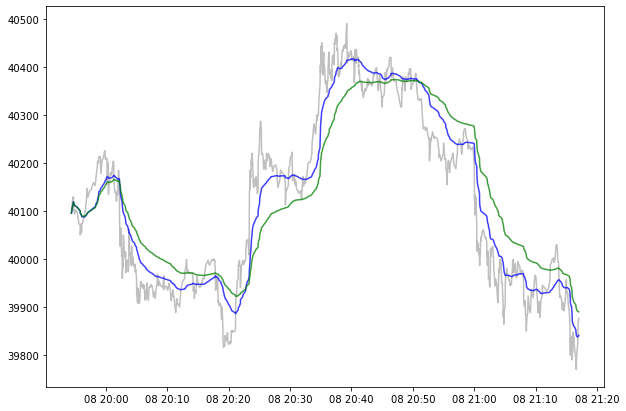

In [37]:
plot = df0[:1000]
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot.price, color="gray", alpha=.5)
ax.plot(plot.fast, color="blue", alpha=.75)
ax.plot(plot.slow, color="green", alpha=.75)

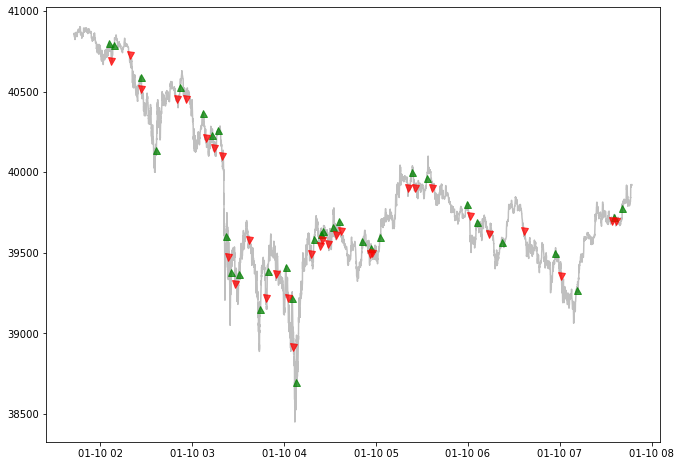

In [36]:
plot = df0
plot["up"] = up
plot["down"] = down
plot = plot[30000:40000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.price, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')




In [24]:
up.index[1]

Timestamp('2021-01-08 20:22:46.714000')

In [26]:
df.loc[up.index[1]]

open      40000.030000
high      40020.590000
low       40000.030000
close     40020.430000
volume        2.508191
Name: 2021-01-08 20:22:46.714000, dtype: float64